# Preprocessing Technics

Exemples simples et didactiques des méthodes de préprocessing en machine learning

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

In [14]:
# Configuration pour les graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")

In [15]:
# Création d'un dataset simple avec des animaux et leurs caractéristiques
data = {
    'animal': ['Chien', 'Chat', 'Cheval', 'Chien', 'Chat', 'Éléphant', 'Girafe', 'Chien', 'Cheval', 'Éléphant'],
    'couleur': ['Brun', 'Blanc', 'Noir', 'Noir', 'Roux', 'Gris', 'Jaune', 'Blanc', 'Brun', 'Gris'],
    'taille_cm': [60, 30, 180, 50, np.nan, 300, 500, 55, np.nan, 310],
    'poids_kg': [25, 4, 450, 20, 5, np.nan, 800, 22, 400, 5000],
    'age_annees': [5, 3, 12, 2, 7, 25, 10, np.nan, 8, 30],
    'vitesse_kmh': [40, 30, 70, 35, 32, 25, 50, 38, 75, 30]
}

# Création du DataFrame
df = pd.DataFrame(data)
print("Dataset original:")
print(df)


Dataset original:
     animal couleur  taille_cm  poids_kg  age_annees  vitesse_kmh
0     Chien    Brun       60.0      25.0         5.0           40
1      Chat   Blanc       30.0       4.0         3.0           30
2    Cheval    Noir      180.0     450.0        12.0           70
3     Chien    Noir       50.0      20.0         2.0           35
4      Chat    Roux        NaN       5.0         7.0           32
5  Éléphant    Gris      300.0       NaN        25.0           25
6    Girafe   Jaune      500.0     800.0        10.0           50
7     Chien   Blanc       55.0      22.0         NaN           38
8    Cheval    Brun        NaN     400.0         8.0           75
9  Éléphant    Gris      310.0    5000.0        30.0           30


## 1. DATA CLEANING

In [16]:
# print("\n\n=============================================")
# print("1. DATA CLEANING")
# print("=============================================")

### 1.1 Imputation simple (mean, median, mode)


In [17]:
print("\n1.1 Imputation simple (mean, median, mode)")
print("-------------------------------------------")

# Affichage des valeurs manquantes
print("Valeurs manquantes dans le dataset:")
print(df.isnull().sum())


1.1 Imputation simple (mean, median, mode)
-------------------------------------------
Valeurs manquantes dans le dataset:
animal         0
couleur        0
taille_cm      2
poids_kg       1
age_annees     1
vitesse_kmh    0
dtype: int64


In [18]:
# Exemple avec la moyenne
imputer_mean = SimpleImputer(strategy='mean')
df_mean = df.copy()
df_mean[['taille_cm', 'poids_kg', 'age_annees']] = imputer_mean.fit_transform(df[['taille_cm', 'poids_kg', 'age_annees']])
print("\nDonnées après imputation par la moyenne:")
print(df_mean[['taille_cm', 'poids_kg', 'age_annees']])


Données après imputation par la moyenne:
   taille_cm     poids_kg  age_annees
0     60.000    25.000000    5.000000
1     30.000     4.000000    3.000000
2    180.000   450.000000   12.000000
3     50.000    20.000000    2.000000
4    185.625     5.000000    7.000000
5    300.000   747.333333   25.000000
6    500.000   800.000000   10.000000
7     55.000    22.000000   11.333333
8    185.625   400.000000    8.000000
9    310.000  5000.000000   30.000000


In [19]:
# Exemple avec la médiane
imputer_median = SimpleImputer(strategy='median')
df_median = df.copy()
df_median[['taille_cm', 'poids_kg', 'age_annees']] = imputer_median.fit_transform(df[['taille_cm', 'poids_kg', 'age_annees']])
print("\nDonnées après imputation par la médiane:")
print(df_median[['taille_cm', 'poids_kg', 'age_annees']])


Données après imputation par la médiane:
   taille_cm  poids_kg  age_annees
0       60.0      25.0         5.0
1       30.0       4.0         3.0
2      180.0     450.0        12.0
3       50.0      20.0         2.0
4      120.0       5.0         7.0
5      300.0      25.0        25.0
6      500.0     800.0        10.0
7       55.0      22.0         8.0
8      120.0     400.0         8.0
9      310.0    5000.0        30.0


In [20]:
# Exemple avec le mode
imputer_mode = SimpleImputer(strategy='most_frequent')
df_mode = df.copy()
df_mode[['taille_cm', 'poids_kg', 'age_annees']] = imputer_mode.fit_transform(df[['taille_cm', 'poids_kg', 'age_annees']])
print("\nDonnées après imputation par le mode:")
print(df_mode[['taille_cm', 'poids_kg', 'age_annees']])


Données après imputation par le mode:
   taille_cm  poids_kg  age_annees
0       60.0      25.0         5.0
1       30.0       4.0         3.0
2      180.0     450.0        12.0
3       50.0      20.0         2.0
4       30.0       5.0         7.0
5      300.0       4.0        25.0
6      500.0     800.0        10.0
7       55.0      22.0         2.0
8       30.0     400.0         8.0
9      310.0    5000.0        30.0


### 1.2 KNN Imputer

In [21]:
# print("\n1.2 KNN Imputer")
# print("---------------")

# Exemple avec KNN Imputer (n_neighbors=3)
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = df.copy()
numeric_cols = ['taille_cm', 'poids_kg', 'age_annees', 'vitesse_kmh']
df_knn[numeric_cols] = imputer_knn.fit_transform(df[numeric_cols])
print("Données après imputation par KNN (n_neighbors=3):")
print(df_knn[numeric_cols])

Données après imputation par KNN (n_neighbors=3):
    taille_cm     poids_kg  age_annees  vitesse_kmh
0   60.000000    25.000000    5.000000         40.0
1   30.000000     4.000000    3.000000         30.0
2  180.000000   450.000000   12.000000         70.0
3   50.000000    20.000000    2.000000         35.0
4   46.666667     5.000000    7.000000         32.0
5  300.000000  1801.666667   25.000000         25.0
6  500.000000   800.000000   10.000000         50.0
7   55.000000    22.000000    4.666667         38.0
8  180.000000   400.000000    8.000000         75.0
9  310.000000  5000.000000   30.000000         30.0


### 1.3 Suppression de lignes et colonnes avec trop de valeurs manquantes

In [22]:
print("\n1.3 Suppression de lignes et colonnes avec trop de valeurs manquantes")
print("--------------------------------------------------------------------")

# Création d'un dataframe avec plus de valeurs manquantes pour l'exemple
df_na = df.copy()
df_na.loc[2:5, 'vitesse_kmh'] = np.nan  # Ajout de NaN dans vitesse_kmh
df_na.loc[7:8, 'poids_kg'] = np.nan     # Ajout de NaN dans poids_kg
print("Dataset avec plus de valeurs manquantes:")
print(df_na.isnull().sum())

# Suppression des lignes avec > 30% de valeurs manquantes
df_drop_rows = df_na.dropna(thresh=df_na.shape[1] * 0.7)
print("\nDonnées après suppression des lignes avec > 30% de valeurs manquantes:")
print(f"Avant: {df_na.shape[0]} lignes, Après: {df_drop_rows.shape[0]} lignes")

# Suppression des colonnes avec > 30% de valeurs manquantes
df_drop_cols = df_na.dropna(axis=1, thresh=df_na.shape[0] * 0.7)
print("\nDonnées après suppression des colonnes avec > 30% de valeurs manquantes:")
print(f"Avant: {df_na.shape[1]} colonnes, Après: {df_drop_cols.shape[1]} colonnes")
print(f"Colonnes supprimées: {set(df_na.columns) - set(df_drop_cols.columns)}")


1.3 Suppression de lignes et colonnes avec trop de valeurs manquantes
--------------------------------------------------------------------
Dataset avec plus de valeurs manquantes:
animal         0
couleur        0
taille_cm      2
poids_kg       3
age_annees     1
vitesse_kmh    4
dtype: int64

Données après suppression des lignes avec > 30% de valeurs manquantes:
Avant: 10 lignes, Après: 6 lignes

Données après suppression des colonnes avec > 30% de valeurs manquantes:
Avant: 6 colonnes, Après: 5 colonnes
Colonnes supprimées: {'vitesse_kmh'}


### 1.4 Traitement des outliers

In [23]:
print("\n1.4 Traitement des outliers")
print("-------------------------")

# Création d'un dataframe avec des outliers pour l'exemple
df_outliers = df_mean.copy()
df_outliers.loc[9, 'poids_kg'] = 9000  # Ajout d'un outlier
df_outliers.loc[8, 'age_annees'] = 40  # Ajout d'un autre outlier

print("Dataset avec outliers:")
print(df_outliers[['taille_cm', 'poids_kg', 'age_annees']])


1.4 Traitement des outliers
-------------------------
Dataset avec outliers:
   taille_cm     poids_kg  age_annees
0     60.000    25.000000    5.000000
1     30.000     4.000000    3.000000
2    180.000   450.000000   12.000000
3     50.000    20.000000    2.000000
4    185.625     5.000000    7.000000
5    300.000   747.333333   25.000000
6    500.000   800.000000   10.000000
7     55.000    22.000000   11.333333
8    185.625   400.000000   40.000000
9    310.000  9000.000000   30.000000


#### Méthode 1: Z-Score

In [24]:
print("\nDétection des outliers avec Z-Score (|z| > 2):")
z_scores = stats.zscore(df_outliers[['taille_cm', 'poids_kg', 'age_annees']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
df_z_filtered = df_outliers[filtered_entries]
print(f"Outliers détectés par Z-Score: {(~filtered_entries).sum()} observations")
print(f"Nouvelles dimensions: {df_z_filtered.shape}")


Détection des outliers avec Z-Score (|z| > 2):
Outliers détectés par Z-Score: 3 observations
Nouvelles dimensions: (7, 6)


#### Méthode 2: IQR (Interquartile Range)



Détection des outliers avec IQR (1.5 * IQR):
Outliers détectés par IQR: 1 observations
Nouvelles dimensions: (9, 6)


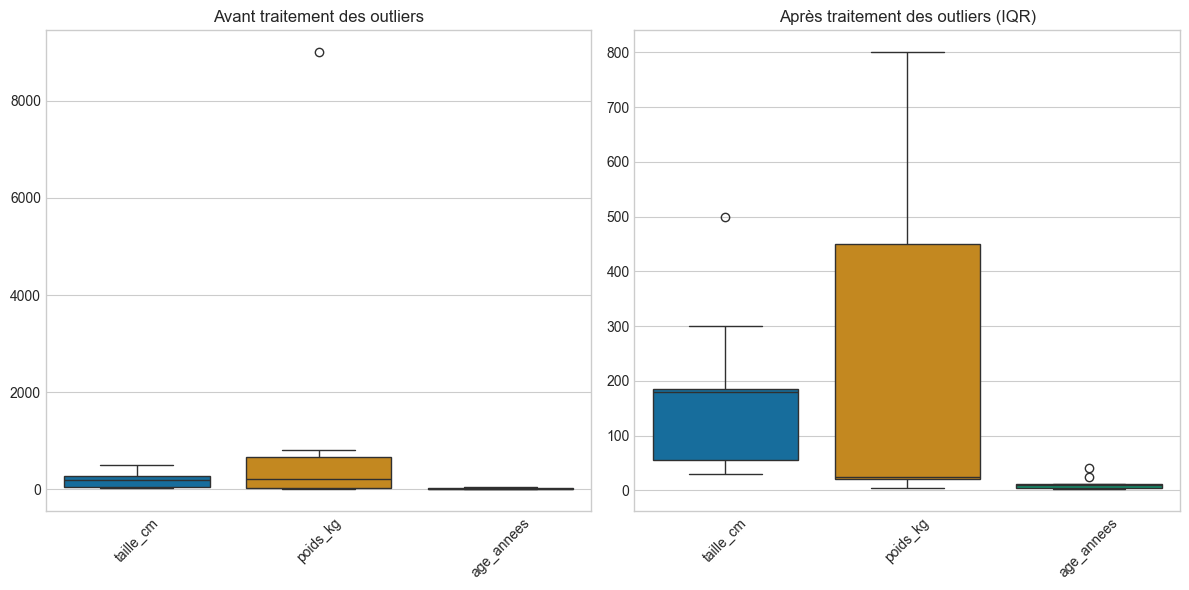

In [25]:
print("\nDétection des outliers avec IQR (1.5 * IQR):")
Q1 = df_outliers[['taille_cm', 'poids_kg', 'age_annees']].quantile(0.25)
Q3 = df_outliers[['taille_cm', 'poids_kg', 'age_annees']].quantile(0.75)
IQR = Q3 - Q1

# Création d'un masque pour filtrer les outliers
outlier_mask = ((df_outliers[['taille_cm', 'poids_kg', 'age_annees']] < (Q1 - 1.5 * IQR)) | 
                (df_outliers[['taille_cm', 'poids_kg', 'age_annees']] > (Q3 + 1.5 * IQR))).any(axis=1)

df_iqr_filtered = df_outliers[~outlier_mask]
print(f"Outliers détectés par IQR: {outlier_mask.sum()} observations")
print(f"Nouvelles dimensions: {df_iqr_filtered.shape}")

# Visualisation des outliers avec un boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_outliers[['taille_cm', 'poids_kg', 'age_annees']])
plt.title('Avant traitement des outliers')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_iqr_filtered[['taille_cm', 'poids_kg', 'age_annees']])
plt.title('Après traitement des outliers (IQR)')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('outliers_detection.png')
#plt.close()

## 2. PREPROCESSING

In [26]:
# print("\n\n=============================================")
# print("2. PREPROCESSING")
# print("=============================================")

In [27]:
# Utilisation du dataframe sans les outliers pour la suite
df_clean = df_mean.copy()

### 2.1 Encoding des variables catégorielles

In [28]:
print("\n2.1 Encoding des variables catégorielles")
print("--------------------------------------")


2.1 Encoding des variables catégorielles
--------------------------------------


In [29]:
# Label Encoder (pour les variables ordinales)
print("\nLabel Encoder (pour les variables ordinales):")
le = LabelEncoder()
df_clean['animal_encoded'] = le.fit_transform(df_clean['animal'])
print(pd.DataFrame({'animal': df_clean['animal'], 'animal_encoded': df_clean['animal_encoded']}))
print(f"Mapping: {dict(zip(le.classes_, range(len(le.classes_))))}")


Label Encoder (pour les variables ordinales):
     animal  animal_encoded
0     Chien               2
1      Chat               0
2    Cheval               1
3     Chien               2
4      Chat               0
5  Éléphant               4
6    Girafe               3
7     Chien               2
8    Cheval               1
9  Éléphant               4
Mapping: {'Chat': 0, 'Cheval': 1, 'Chien': 2, 'Girafe': 3, 'Éléphant': 4}


In [30]:
# One-Hot Encoder (pour les variables nominales)
print("\nOne-Hot Encoder (pour les variables nominales):")
ohe = OneHotEncoder(sparse_output=False)
animal_encoded = ohe.fit_transform(df_clean[['animal']])
animal_encoded_df = pd.DataFrame(animal_encoded, columns=[f'animal_{cat}' for cat in ohe.categories_[0]])
print(animal_encoded_df.head())

# Ajout des données encodées au dataframe
df_clean = pd.concat([df_clean, animal_encoded_df], axis=1)
print("\nDonnées avec encoding One-Hot:")
print(df_clean[['animal'] + [col for col in df_clean.columns if 'animal_' in col]].head())


One-Hot Encoder (pour les variables nominales):
   animal_Chat  animal_Cheval  animal_Chien  animal_Girafe  animal_Éléphant
0          0.0            0.0           1.0            0.0              0.0
1          1.0            0.0           0.0            0.0              0.0
2          0.0            1.0           0.0            0.0              0.0
3          0.0            0.0           1.0            0.0              0.0
4          1.0            0.0           0.0            0.0              0.0

Données avec encoding One-Hot:
   animal  animal_encoded  animal_Chat  animal_Cheval  animal_Chien  \
0   Chien               2          0.0            0.0           1.0   
1    Chat               0          1.0            0.0           0.0   
2  Cheval               1          0.0            1.0           0.0   
3   Chien               2          0.0            0.0           1.0   
4    Chat               0          1.0            0.0           0.0   

   animal_Girafe  animal_Éléphant  


In [31]:
# Target Encoding (simulé pour l'exemple)
print("\nTarget Encoding (moyenne de la variable cible par catégorie):")
# On va simuler un target encoding en utilisant la vitesse comme variable cible
target_means = df_clean.groupby('animal')['vitesse_kmh'].mean().to_dict()
df_clean['animal_target_encoded'] = df_clean['animal'].map(target_means)
print(pd.DataFrame({
    'animal': df_clean['animal'], 
    'vitesse_kmh': df_clean['vitesse_kmh'],
    'animal_target_encoded': df_clean['animal_target_encoded']
}))


Target Encoding (moyenne de la variable cible par catégorie):
     animal  vitesse_kmh  animal_target_encoded
0     Chien           40              37.666667
1      Chat           30              31.000000
2    Cheval           70              72.500000
3     Chien           35              37.666667
4      Chat           32              31.000000
5  Éléphant           25              27.500000
6    Girafe           50              50.000000
7     Chien           38              37.666667
8    Cheval           75              72.500000
9  Éléphant           30              27.500000


### 2.2 Scaling des variables numériques

In [32]:
print("\n2.2 Scaling des variables numériques")
print("---------------------------------")

# Sélection des colonnes numériques
numeric_cols = ['taille_cm', 'poids_kg', 'age_annees']


2.2 Scaling des variables numériques
---------------------------------


In [35]:
# StandardScaler (normalisation: moyenne = 0, écart-type = 1)
print("\nStandardScaler (normalisation: moyenne = 0, écart-type = 1):")
scaler = StandardScaler()
df_clean[[col + '_scaled' for col in numeric_cols]] = scaler.fit_transform(df_clean[numeric_cols])
print(df_clean[[col + '_scaled' for col in numeric_cols]].describe().round(2))


StandardScaler (normalisation: moyenne = 0, écart-type = 1):
       taille_cm_scaled  poids_kg_scaled  age_annees_scaled
count             10.00            10.00              10.00
mean               0.00            -0.00              -0.00
std                1.05             1.05               1.05
min               -1.09            -0.51              -1.07
25%               -0.91            -0.50              -0.67
50%               -0.02            -0.37              -0.27
75%                0.60            -0.05               0.06
max                2.21             2.94               2.14


In [36]:
# MinMaxScaler (mise à l'échelle: min = 0, max = 1)
print("\nMinMaxScaler (mise à l'échelle: min = 0, max = 1):")
min_max_scaler = MinMaxScaler()
df_clean[[col + '_minmax' for col in numeric_cols]] = min_max_scaler.fit_transform(df_clean[numeric_cols])
print(df_clean[[col + '_minmax' for col in numeric_cols]].describe().round(2))


MinMaxScaler (mise à l'échelle: min = 0, max = 1):
       taille_cm_minmax  poids_kg_minmax  age_annees_minmax
count             10.00            10.00              10.00
mean               0.33             0.15               0.33
std                0.32             0.31               0.33
min                0.00             0.00               0.00
25%                0.06             0.00               0.12
50%                0.33             0.04               0.25
75%                0.51             0.13               0.35
max                1.00             1.00               1.00


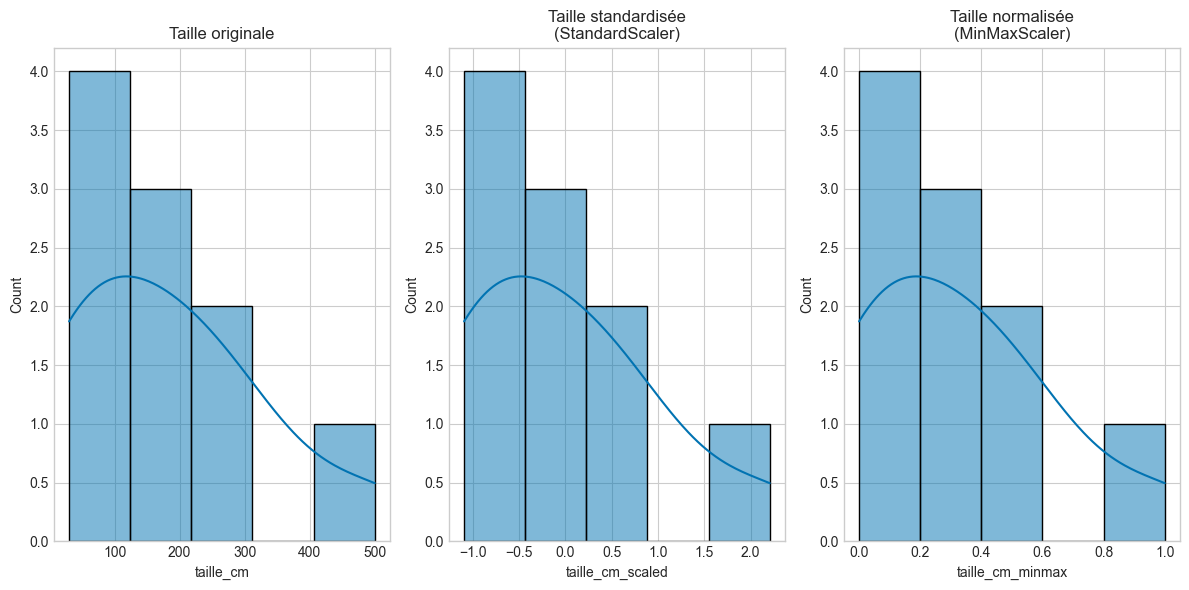

In [37]:
# Visualisation des différentes méthodes de scaling sur la taille
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df_clean['taille_cm'], kde=True)
plt.title('Taille originale')

plt.subplot(1, 3, 2)
sns.histplot(df_clean['taille_cm_scaled'], kde=True)
plt.title('Taille standardisée\n(StandardScaler)')

plt.subplot(1, 3, 3)
sns.histplot(df_clean['taille_cm_minmax'], kde=True)
plt.title('Taille normalisée\n(MinMaxScaler)')

plt.tight_layout()
#plt.savefig('scaling_comparison.png')
#plt.close()

### 2.3 Feature Engineering (application de fonctions dérivées)


2.3 Feature Engineering (application de fonctions dérivées)
--------------------------------------------------------
Nouvelles caractéristiques dérivées:
     animal  ratio_poids_taille  densité  vitesse_relative  log_poids
0     Chien               0.417  115.741             0.667      3.258
1      Chat               0.133  148.148             1.000      1.609
2    Cheval               2.500   77.160             0.389      6.111
3     Chien               0.400  160.000             0.700      3.045
4      Chat               0.027    0.782             0.172      1.792
5  Éléphant               2.491   27.679             0.083      6.618
6    Girafe               1.600    6.400             0.100      6.686
7     Chien               0.400  132.231             0.691      3.135
8    Cheval               2.155   62.539             0.404      5.994
9  Éléphant              16.129  167.836             0.097      8.517


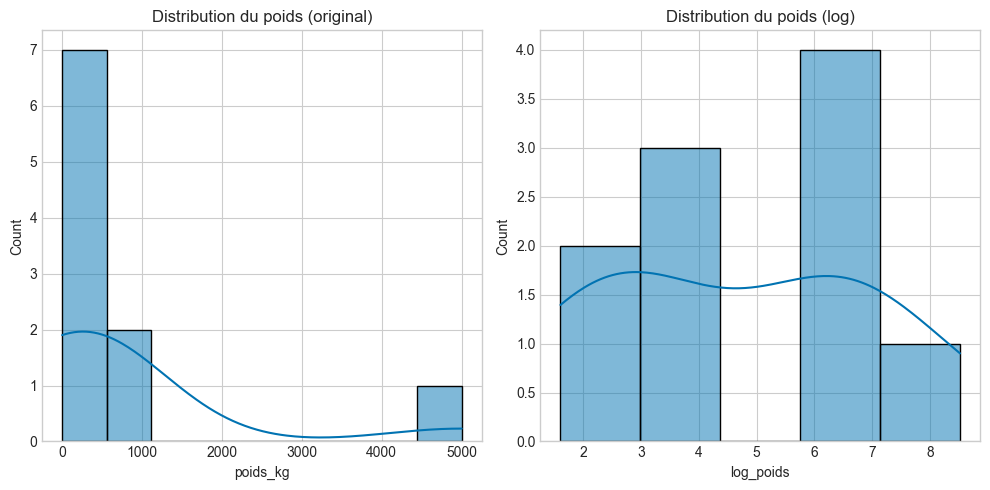

In [39]:
print("\n2.3 Feature Engineering (application de fonctions dérivées)")
print("--------------------------------------------------------")

# Création de nouvelles caractéristiques à partir des existantes
df_clean['ratio_poids_taille'] = df_clean['poids_kg'] / df_clean['taille_cm']
df_clean['densité'] = df_clean['poids_kg'] / (df_clean['taille_cm'] ** 3) * 1000000  # Mesure de densité (simulée)
df_clean['vitesse_relative'] = df_clean['vitesse_kmh'] / df_clean['taille_cm']  # Vitesse par unité de taille

# Transformation logarithmique pour les variables avec forte asymétrie
df_clean['log_poids'] = np.log1p(df_clean['poids_kg'])  # log1p pour éviter log(0)

print("Nouvelles caractéristiques dérivées:")
print(df_clean[['animal', 'ratio_poids_taille', 'densité', 'vitesse_relative', 'log_poids']].round(3))

# Visualisation de l'effet de la transformation logarithmique
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['poids_kg'], kde=True)
plt.title('Distribution du poids (original)')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['log_poids'], kde=True)
plt.title('Distribution du poids (log)')

plt.tight_layout()
#plt.savefig('log_transformation.png')
#plt.close()


### 2.4 Discrétisation (binning)

In [40]:
print("\n2.4 Discrétisation (binning)")
print("---------------------------")

# Méthode 1: Discrétisation manuelle avec pd.cut
print("\nDiscrétisation manuelle avec pd.cut:")
df_clean['taille_cat'] = pd.cut(df_clean['taille_cm'], 
                               bins=[0, 50, 100, 200, 1000],
                               labels=['Petit', 'Moyen', 'Grand', 'Très grand'])
print(df_clean[['animal', 'taille_cm', 'taille_cat']].sort_values('taille_cm'))


2.4 Discrétisation (binning)
---------------------------

Discrétisation manuelle avec pd.cut:
     animal  taille_cm  taille_cat
1      Chat     30.000       Petit
3     Chien     50.000       Petit
7     Chien     55.000       Moyen
0     Chien     60.000       Moyen
2    Cheval    180.000       Grand
4      Chat    185.625       Grand
8    Cheval    185.625       Grand
5  Éléphant    300.000  Très grand
9  Éléphant    310.000  Très grand
6    Girafe    500.000  Très grand


In [41]:
# Méthode 2: Discrétisation automatique avec KBinsDiscretizer
print("\nDiscrétisation automatique avec KBinsDiscretizer:")
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df_clean['taille_bins'] = discretizer.fit_transform(df_clean[['taille_cm']])
print(df_clean[['animal', 'taille_cm', 'taille_bins']].sort_values('taille_cm'))
print(f"Limites des bins (strategy='quantile'): {discretizer.bin_edges_[0].round(2)}")


Discrétisation automatique avec KBinsDiscretizer:
     animal  taille_cm  taille_bins
1      Chat     30.000          0.0
3     Chien     50.000          0.0
7     Chien     55.000          0.0
0     Chien     60.000          1.0
2    Cheval    180.000          1.0
4      Chat    185.625          2.0
8    Cheval    185.625          2.0
5  Éléphant    300.000          3.0
9  Éléphant    310.000          3.0
6    Girafe    500.000          3.0
Limites des bins (strategy='quantile'): [ 30.    56.25 182.81 271.41 500.  ]


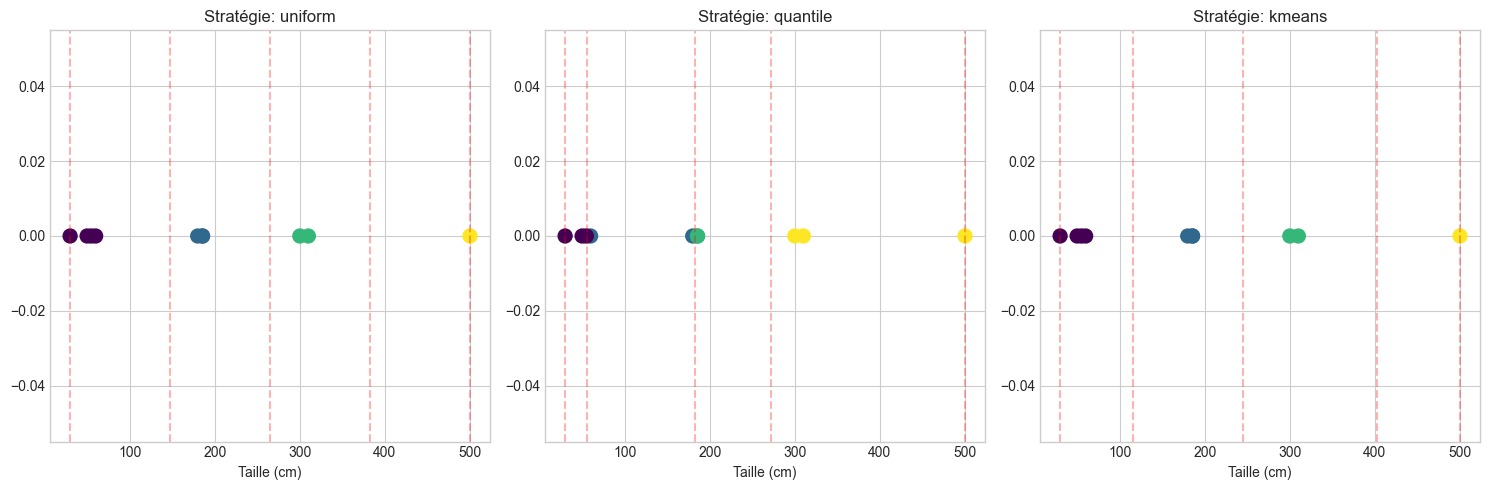

In [42]:
# Comparaison des différentes stratégies de binning
strategies = ['uniform', 'quantile', 'kmeans']
plt.figure(figsize=(15, 5))

for i, strategy in enumerate(strategies):
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy=strategy)
    bins = discretizer.fit_transform(df_clean[['taille_cm']])
    
    plt.subplot(1, 3, i+1)
    plt.scatter(df_clean['taille_cm'], np.zeros_like(df_clean['taille_cm']), c=bins, cmap='viridis', s=100)
    plt.xlabel('Taille (cm)')
    plt.title(f"Stratégie: {strategy}")
    plt.grid(True)
    
    # Ajout des limites des bins
    for edge in discretizer.bin_edges_[0]:
        plt.axvline(x=edge, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
#plt.savefig('binning_strategies.png')
#plt.close()

In [ ]:
print("\n============================================")
print("Résumé des techniques de préprocessing")
print("============================================")

print("""
1. DATA CLEANING:
   - Imputation simple: mean, median, mode
   - KNN Imputer: utilise les k voisins les plus proches
   - Suppression: élimination des lignes ou colonnes avec trop de valeurs manquantes
   - Traitement des outliers: méthodes Z-Score et IQR

2. PREPROCESSING:
   - Encoding: transformation des variables catégorielles en valeurs numériques
   - Scaling: normalisation et standardisation des variables numériques
   - Feature Engineering: création de nouvelles caractéristiques dérivées
   - Discrétisation: transformation de variables continues en catégories
""")

print("\nTraitement des données terminé!")


Résumé des techniques de préprocessing

1. DATA CLEANING:
   - Imputation simple: mean, median, mode
   - KNN Imputer: utilise les k voisins les plus proches
   - Suppression: élimination des lignes ou colonnes avec trop de valeurs manquantes
   - Traitement des outliers: méthodes Z-Score et IQR

2. PREPROCESSING:
   - Encoding: transformation des variables catégorielles en valeurs numériques
   - Scaling: normalisation et standardisation des variables numériques
   - Feature Engineering: création de nouvelles caractéristiques dérivées
   - Discrétisation: transformation de variables continues en catégories


Traitement des données terminé!
